# Abalone

# Introduction

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age.

## Target Feature

The target feature is the rings of abalone. It is an integer to describe the age of abalone, number of rings add
1.5 gives the age in years of them.

 ### Descriptive Features
    
    The variable description is produced here from abalone file:
        
1.  Name / Data Type / Measurement Unit / Description

2.  Sex / nominal / -- / M, F, and I (infant)

3.  Length / continuous / mm / Longest shell measurement

4.  Diameter / continuous / mm / perpendicular to length

5.  Height / continuous / mm / with meat in shell

6.  Whole weight / continuous / grams / whole abalone

7.  Shucked weight / continuous / grams / weight of meat

8.  Viscera weight / continuous / grams / gut weight (after bleeding)

9.  Shell weight / continuous / grams / after being dried

10. Rings / integer / -- / +1.5 gives the age in years


In [2]:
#import improtant libraise

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load data 
data=pd.read_csv("C:/Users/rahul.tiwari2019/Desktop/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [7]:
print('This dataset has {} observations with {} features.'.format(data.shape[0], data.shape[1]))

This dataset has 4177 observations with 9 features.


In [8]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [9]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


We can see there is no any missing value.

In [13]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_enc=LabelEncoder()
data['Sex']=label_enc.fit_transform(data['Sex'])
data.head()
data_len_raw=data.shape[0]

In [17]:
data['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [18]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Add a Column "Age"

In problem statement it is given that Rings+1.5 gives the age of the abalone in years.So we can add a age column as feature.

In [19]:
data['Age']=data['Rings']+1.5
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


array([[<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>],
       [<AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>,
        <AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

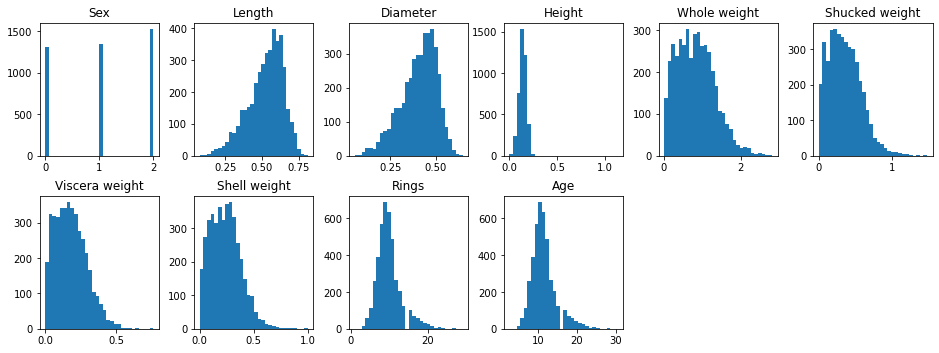

In [23]:
data.hist(figsize=(16,12), grid=False, layout=(4, 6), bins = 30)

Oberbations: 1:- We have skewed data in Hight, Whole Weight, Shucked Weight, Viscera Weight

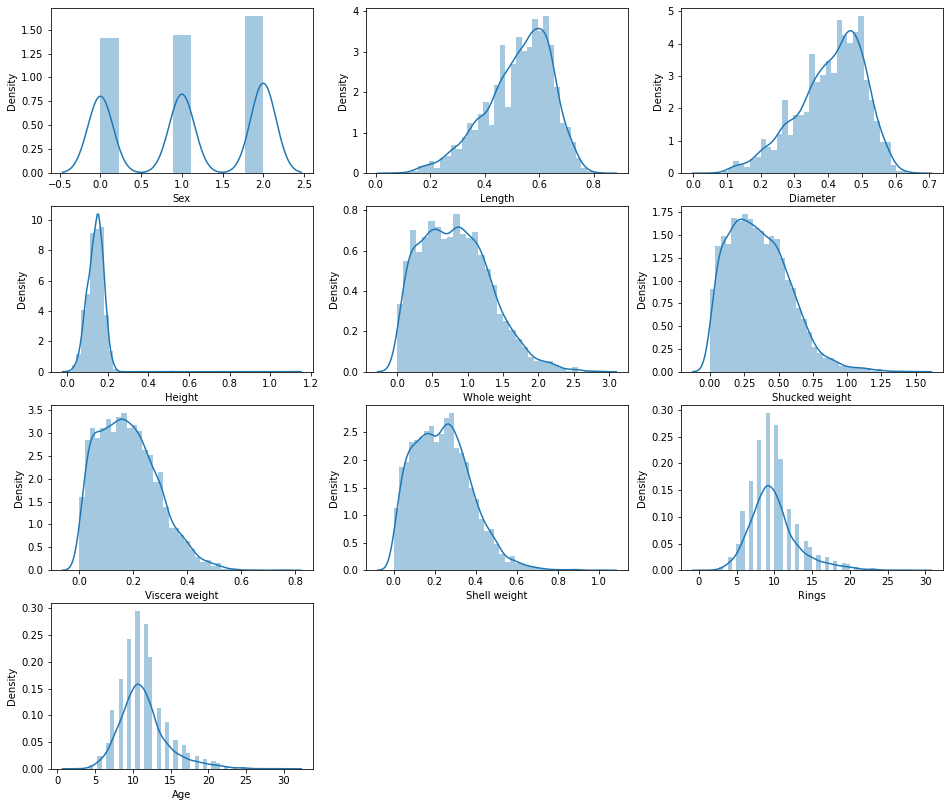

In [33]:
plt.figure(figsize=(16,14))
pltno=1
for col in data.columns:
    ax=plt.subplot(4,3,pltno)
    sns.distplot(data[col])
    pltno+=1
plt.show()

We have check curv in this plot and curv is properly show in the above figure. 

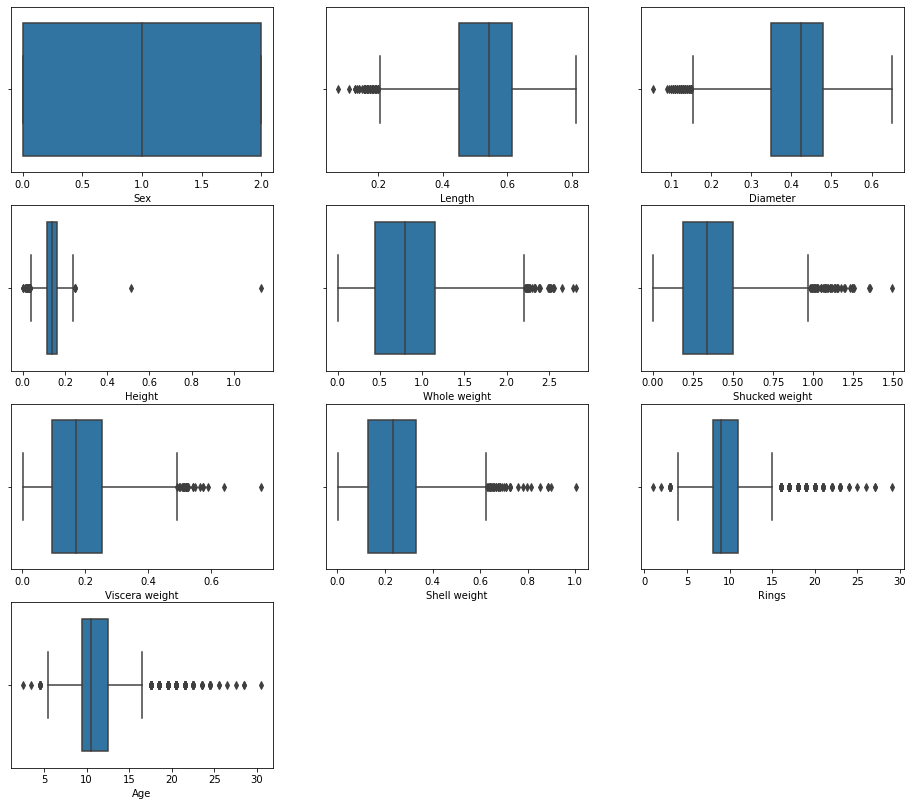

In [34]:
plt.figure(figsize=(16,14))
pltno=1
for col in data.columns:
    ax=plt.subplot(4,3,pltno)
    sns.boxplot(data[col])
    pltno+=1
plt.show()

In [35]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

We can see there are outliers in Length,Diameter,Height,WholeWeight,Shucked Weight,Viscera weight,shell weight

In [36]:
from scipy.stats import zscore
zscore=zscore(data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']])
abs_score=np.abs(zscore)
filtering=(abs_score<3).all(axis=1)
data=data[filtering]
print(data.shape)
data_len_after_outliers_removal=data.shape[0]
data.describe()

(4027, 10)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,1.051403,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763,11.238763
std,0.818071,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691,2.864691
min,0.000000,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000,4.500000
25%,0.000000,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000,9.500000
50%,1.000000,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000,10.500000
75%,2.000000,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000,12.500000
max,2.000000,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000,20.500000


We Removed the Outliers from Length,Diameter,Height,Whole weight,shucked weight,viscera weight,shell weight using Zscore method

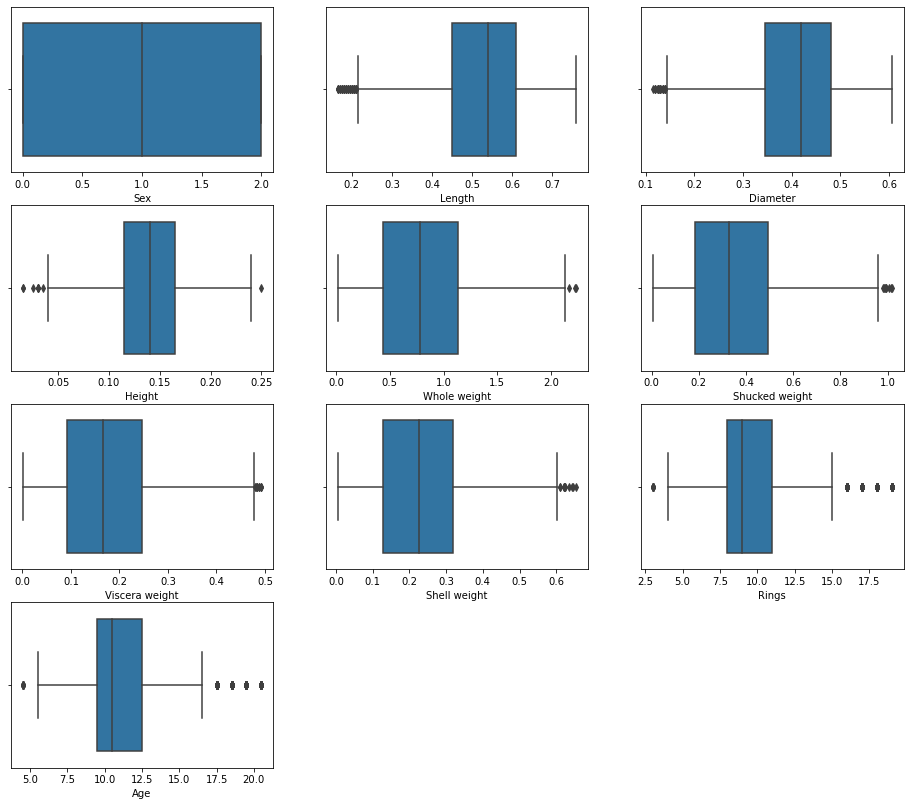

In [37]:
plt.figure(figsize=(16,14))
pltno=1
for col in data.columns:
    ax=plt.subplot(4,3,pltno)
    sns.boxplot(data[col])
    pltno+=1
plt.show()

We removed most of outliers form dataset. Now we can see better in dataset we can ahead this dataset.

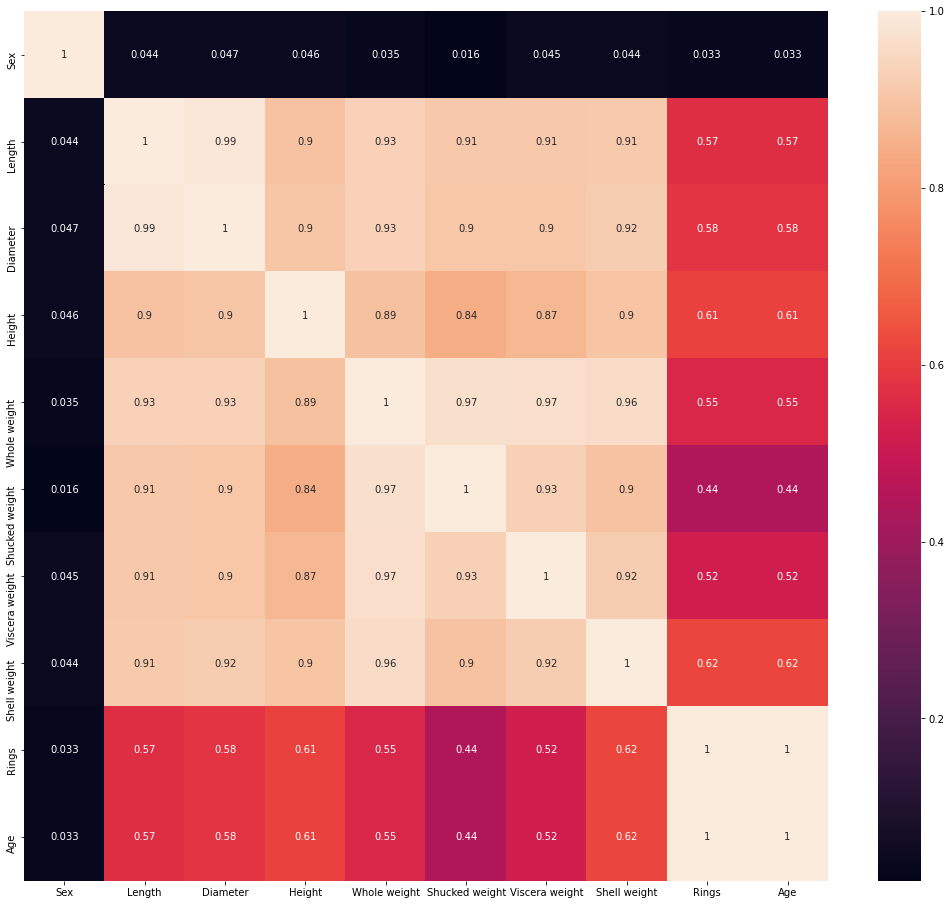

In [40]:
plt.figure(figsize=(18,16))
ab_corr=data.corr().abs()
sns.heatmap(ab_corr,annot=True)
plt.show()

Observations:

1. Length and Diameter are strongly correlated with each other

2. Length is contributing 57% and Diamtere is contributing 58%, hence we can remove Length

3. Whole weight is strongly correlated with Shucked weight and Viscera weight that is 97%.

4. Whole weight is contributing 55%, shucker weight is contributing 44% and Viscrea weight is contributing 52% to the target.

5. Whole weight is 96% correlated with Shell weight and shell weight is contributing 62% to the target.

Conclusion: Since we have small data set, lets go ahead and remove only Length feature, which is almost 99% correlated with Diameter.

In [42]:
data.drop(['Length'],axis=1,inplace=True)

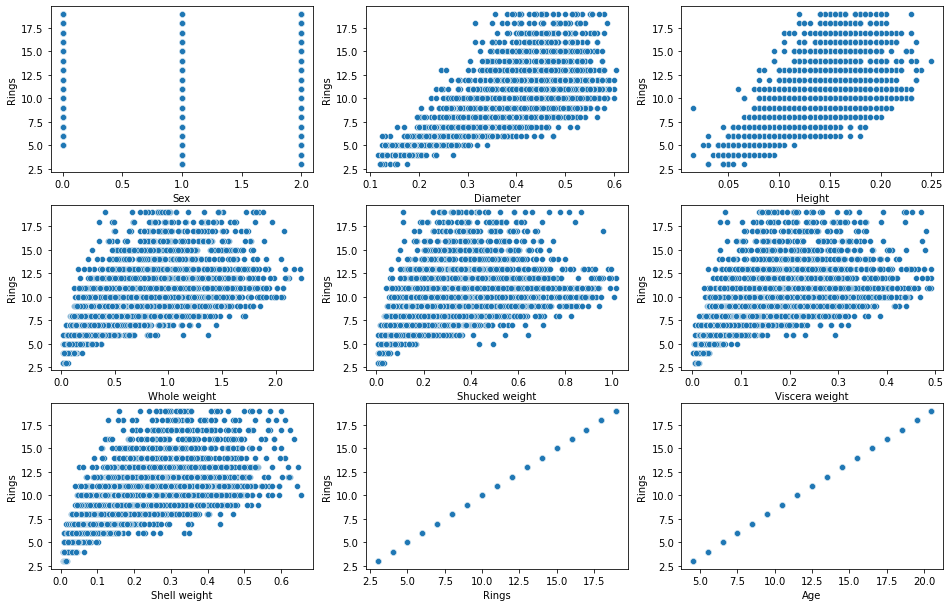

In [43]:
plt.figure(figsize=(16,14))
pltno=1
for col in data.columns:
    ax=plt.subplot(4,3,pltno)
    sns.scatterplot(data[col],data['Rings'])
    pltno+=1
plt.show()

All data positively correlated with target value.

In [44]:
X=data.drop(['Rings'],axis=1)
y=data['Rings']

In [45]:
scale=StandardScaler()
X_scale=scale.fit_transform(X)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X_scale,y,test_size=0.25,random_state=120)

# Model Building
### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [50]:
lr=LinearRegression()
lr.fit(X_train,y_train)
print('Linear Regression')
print('Trianing accuracy score: ',lr.score(X_train,y_train))
y_pred=lr.predict(X_test)
print('Test accuracy score: ',r2_score(y_test,y_pred))
print('Mean absolute error: ',(mean_absolute_error(y_test,y_pred)))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))

Linear Regression
Trianing accuracy score:  1.0
Test accuracy score:  1.0
Mean absolute error:  4.542322603233014e-16
Mean squared error:  7.528255510599726e-31


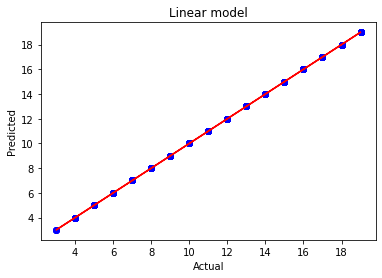

In [51]:
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=y_pred,color='b')
plt.plot(y_pred,y_pred,color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear model')
plt.show()

### Cross Validation scores

In [52]:
print("Cross validation score for Linear Regression: ",cross_val_score(lr,X_scale,y,cv=5).mean())

Cross validation score for Linear Regression:  1.0


In [ ]:
# Save the Model

In [54]:
import pickle
file = 'Abalone Case Study'
#save file
save = pickle.dump(data,open(file,'wb'))